In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/binding_ANS/dati_fit.csv')

# try remove last point (frist data point)
data = data.drop(data.index[0])

# try remove second point
data = data.drop(data.index[0])

data.head(13)

,C_prot,I_peak,err_I_peak
2,21.50366,502.39429,1.06501
3,10.76985,403.40229,1.03285
4,5.39299,329.13129,0.61719
5,2.62752,250.76529,0.43730
6,1.31688,158.39168,0.43836
7,0.65866,81.84520,0.21824
8,0.32895,29.60137,0.11992
9,0.16435,13.67178,0.09597
10,0.08234,5.79959,0.07104
11,0.00000,0.00000,0.10000


In [3]:
# Define the function to fit
def fit_function(P, K_d, n, delta_eta_mezzi):
    C_T = 5 #mu M
    term = (n * P + C_T + K_d)
    sqrt_part = np.sqrt(term**2 - 4 * n * P * C_T)
    return (delta_eta_mezzi) * (term - sqrt_part) + 0

In [4]:
def fit_procedure(initial_guesses, data):
    params, covariance = curve_fit(fit_function, data['C_prot'], data['I_peak'], p0=initial_guesses, sigma=data['err_I_peak'], absolute_sigma=True)
    return params, covariance

Best fit index: 1
Best fit parameters: [ 1.89925261  1.58723896 49.13337068]
Best fit covariance: [[1.92747795e-03 3.94982864e-04 4.65871490e-03]
 [3.94982864e-04 9.90739589e-05 6.54154823e-04]
 [4.65871490e-03 6.54154823e-04 1.80567246e-02]]
Fitted K_d: 1.8992526094378492 ± 0.04390305175653843
Fitted n: 1.5872389563910532 ± 0.009953590250003077
Fitted delta_eta_mezzi: 49.133370678366084 ± 0.13437531243776274


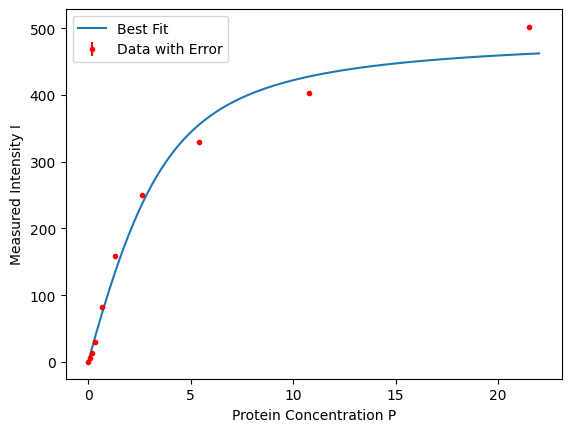

In [7]:
# Initial guesses matrix for K_d, n, and delta_eta_mezzi
initial_guesses_list = [[1, 1, 1], [16, 3, 76], [10, 3, 60]]

result_list = []
for initial_guesses in initial_guesses_list:
    # Perform the fit using error bars
    params, covariance = curve_fit(fit_function, data['C_prot'], data['I_peak'], p0=initial_guesses, sigma=data['err_I_peak'], absolute_sigma=True)
    # Calculate chi squared
    chi_squared = np.sum(((fit_function(data['C_prot'], *params) - data['I_peak']) / data['err_I_peak'])**2)
    # Calculate degrees of freedom
    degrees_of_freedom = len(data) - len(params)
    # Calculate reduced chi squared
    reduced_chi_squared = chi_squared / degrees_of_freedom
    # Append the results to the list
    result_list.append([params, covariance, chi_squared, degrees_of_freedom, reduced_chi_squared])

# Make a DataFrame from the results list
results_df = pd.DataFrame(result_list, columns=['Parameters', 'Covariance', 'Chi Squared', 'Degrees of Freedom', 'Reduced Chi Squared'])

# Find the best fit
best_fit_index = results_df['Reduced Chi Squared'].idxmin()
params, covariance = results_df.loc[best_fit_index, ['Parameters', 'Covariance']]
print(f"Best fit index: {best_fit_index}")
print(f"Best fit parameters: {params}")
print(f"Best fit covariance: {covariance}")

# Plot the data and the best fit
# Extracting fitted parameters
K_d_fitted, n_fitted, delta_eta_fitted = params
errors = np.sqrt(np.diag(covariance))
print(f"Fitted K_d: {K_d_fitted} ± {errors[0]}" )
print(f"Fitted n: {n_fitted} ± {errors[1]}")
print(f"Fitted delta_eta_mezzi: {delta_eta_fitted} ± {errors[2]}")


# Optional: Plot the data and the fit
plt.errorbar(data['C_prot'], data['I_peak'], yerr=data['err_I_peak'], fmt='.', color='red', label='Data with Error')
# linespace from 0 to 22 with 100 points
line_space = np.linspace(0, 22, 100)
plt.plot(line_space, fit_function(line_space, K_d_fitted, n_fitted, delta_eta_fitted), label='Best Fit')
plt.xlabel('Protein Concentration P')
plt.ylabel('Measured Intensity I')
plt.legend()
plt.show()

In [8]:
results_df.head()

,Parameters,Covariance,Chi Squared,Degrees of Freedom,Reduced Chi Squared
0,"[1.8993264118938855, 1.5872656974039974, 49.13...","[[0.0019264500772692105, 0.0003947722398906177...",18112.197294,7,2587.456756
1,"[1.8992526094378492, 1.5872389563910532, 49.13...","[[0.0019274779535372918, 0.0003949828636446902...",18112.197289,7,2587.456756
2,"[1.8991805692375248, 1.5872265886380224, 49.13...","[[0.00192731260821271, 0.00039495656833137666,...",18112.197291,7,2587.456756
